# 8 Label No-Vax Communities
In this notebook we will analyze the labels obtained during the manual classification and compare the thresholds.

- At 1st round of labelling we extracted 20 tweets per community (labels are "pro-vax", "no-vax" or "other").
- We filtered the communities with #no-vax > #pro-vax for the second round of labelling.
- At 2nd round of labelling we extracted the 10 most popular tweet per community, among the ones that were not popular in the rest of the network.

We compare classifications criteria based on the proportion of no-vax labels and on the number of no-vax labels.


In [3]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns

import matplotlib.patches as mpatches
from matplotlib.ticker import LogFormatterExponent, EngFormatter
from matplotlib.colors import LogNorm, SymLogNorm, Normalize, ListedColormap, TwoSlopeNorm
import matplotlib.dates as mdates
from matplotlib.cm import get_cmap
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt


In [4]:
#data on edges and users are stored in this folder
folder = "/data/public/jlenti/multilang-vax/EuropeAmerica_RTCO"

#list of all countries (size ordered)
countries = ["US", "BR", "AR", "GB", "ES", "MX", "FR", "CA", "TR", "VE", "AU", "CO", "IT", "CL", "DE",
             "PT", "IE", "PY", "EC", "RU", "UY", "NZ", "PL", "NL", "PE", "CU", "PA", "GR"]

#named periods
periods = ["period" + str(u + 1) for u in range(4)]


In [50]:
#count of the labels from first round of labeling for each community
label_count_1 = pd.read_csv("/home/jlenti/Files/communities_labels_round1.csv") \
.assign(country = lambda x: [u[:2] for u in x["com_id"]], 
        period = lambda x: ["period" + u[3] for u in x["com_id"]], 
        community = lambda x: [int(u[-1]) for u in x["com_id"]],
        antivax_prop = lambda x: x["antivax"] / (x["antivax"] + x["provax"]))
label_count_1.head()

,com_id,antivax,other,provax,country,period,community,antivax_prop
0,AR_1_1,0.0,10.0,10.0,AR,period1,1,0.000000
1,AR_1_2,0.0,16.0,4.0,AR,period1,2,0.000000
2,AR_2_1,1.0,17.0,2.0,AR,period2,1,0.333333
3,AR_2_2,0.0,16.0,4.0,AR,period2,2,0.000000
4,AR_2_3,0.0,14.0,6.0,AR,period2,3,0.000000


In [51]:
#count of the labels from second round of labeling for each community
label_count_2 = pd.read_csv("/home/jlenti/Files/communities_labels_round2.csv") \
.assign(country = lambda x: [u[:2] for u in x["com_id"]], 
        period = lambda x: ["period" + u[3] for u in x["com_id"]], 
        community = lambda x: [int(u[-1]) for u in x["com_id"]],
        antivax_prop = lambda x: x["antivax"] / (x["antivax"] + x["provax"]))

In [52]:
label_count_2.head()

,com_id,antivax,other,provax,country,period,community,antivax_prop
0,AR_4_3,0.0,8.0,2.0,AR,period4,3,0.000000
1,AU_1_7,7.0,2.0,1.0,AU,period1,7,0.875000
2,AU_1_8,9.0,1.0,0.0,AU,period1,8,1.000000
3,AU_2_2,5.0,4.0,1.0,AU,period2,2,0.833333
4,AU_3_2,4.0,4.0,2.0,AU,period3,2,0.666667


### First Round of Labelling

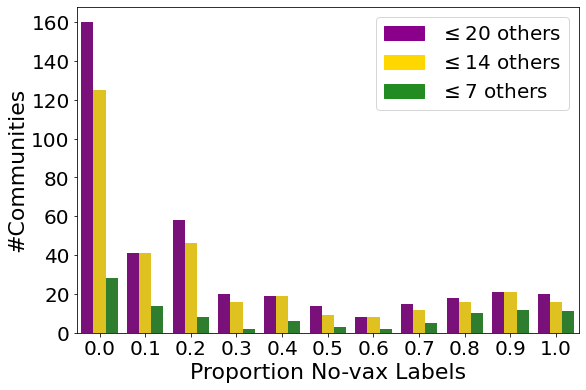

In [54]:
cols = "darkmagenta", "gold", "forestgreen"
patches = []

for col, thres in zip(cols, [20, 14, 7]):
    patches.append(mpatches.Patch(color = col, label = "$\leq$" + str(thres) + " others"))

size = (9,6)
fig, axes = plt.subplots(1,1, figsize = size)

xlab_fsize = 22
ylab_fsize = 22
leg_fsize = 20
yticks_fsize = 20
xticks_fsize = 20


df = pd.concat([label_count_1.assign(filter = "$\leq$20 others"),
                label_count_1.query("other < 15").assign(filter = "$\leq$14 others"),
                label_count_1.query("other < 8").assign(filter = "$\leq$7 others")])



data = df.assign(discrete_prop = lambda x: [round(u, 1) for u in x["antivax_prop"]]).groupby(["discrete_prop", "filter"]).count()["antivax_prop"].reset_index().sort_values("filter")
l = list(np.arange((len(data)*1/3),(len(data)*2/3))) + \
list(np.arange(0,(len(data)*1/3))) + \
list(np.arange(len(data) * 2 / 3, len(data)))

data = data.iloc[l]

sns.barplot(data = data, x = "discrete_prop", y = "antivax_prop", hue = "filter", palette = cols)

axes.set_ylabel("#Communities", fontsize = ylab_fsize)
axes.set_xlabel("Proportion No-vax Labels", fontsize = xlab_fsize)
axes.legend_.set_title(None)

#axes.set_xticks(axes.get_xticks() + 0.2)
plt.setp(axes.get_yticklabels(), fontsize = yticks_fsize, rotation = 0)
plt.setp(axes.get_xticklabels(), fontsize = xticks_fsize, rotation = 0)
plt.legend(handles = patches, fontsize = leg_fsize)


### First + Second Round of Labelling

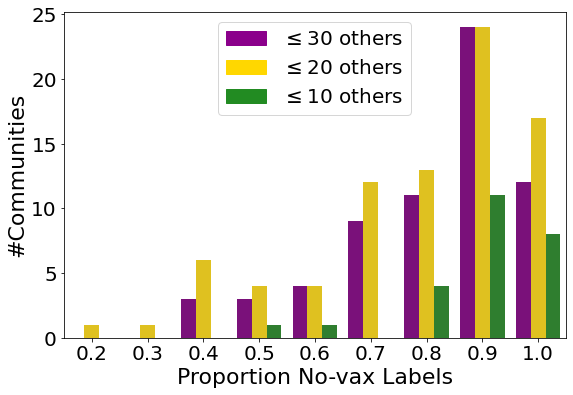

In [62]:
cols = "darkmagenta", "gold", "forestgreen"
patches = []

for col, thres in zip(cols, [30, 20, 10]):
    patches.append(mpatches.Patch(color = col, label = "$\leq$" + str(thres) + " others"))

size = (9,6)
fig, axes = plt.subplots(1,1, figsize = size)

xlab_fsize = 22
ylab_fsize = 22
leg_fsize = 20
yticks_fsize = 20
xticks_fsize = 20


df = (label_count_1.set_index("com_id")[["antivax", "other", "provax"]]  
      + label_count_2.set_index("com_id")[["antivax", "other", "provax"]]).dropna()
df = pd.concat([df.assign(filter = "$\leq$30 others"),
                df.query("other < 20").assign(filter = "$\leq$20 others"),
                df.query("other < 10").assign(filter = "$\leq$10 others")]) \
.assign(antivax_prop = lambda x: x["antivax"] / (x["antivax"] + x["provax"]))



data = df.assign(discrete_prop = lambda x: [round(u, 1) for u in x["antivax_prop"]]) \
.groupby(["discrete_prop", "filter"]).count()["antivax_prop"].reset_index().sort_values("filter")

l = list(np.arange((len(data)*1/3),(len(data)*2/3))) + \
list(np.arange(0,(len(data)*1/3))) + \
list(np.arange(len(data) * 2 / 3, len(data)))

data = data.iloc[l]

sns.barplot(data = data, x = "discrete_prop", y = "antivax_prop", hue = "filter", palette = cols)

axes.set_ylabel("#Communities", fontsize = ylab_fsize)
axes.set_xlabel("Proportion No-vax Labels", fontsize = xlab_fsize)
axes.legend_.set_title(None)

#axes.set_xticks(axes.get_xticks() + 0.2)
plt.setp(axes.get_yticklabels(), fontsize = yticks_fsize, rotation = 0)
plt.setp(axes.get_xticklabels(), fontsize = xticks_fsize, rotation = 0)
plt.legend(handles = patches, fontsize = leg_fsize)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


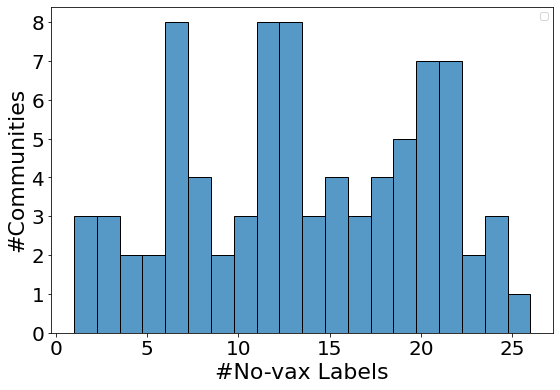

In [69]:
size = (9,6)
fig, axes = plt.subplots(1,1, figsize = size)

xlab_fsize = 22
ylab_fsize = 22
leg_fsize = 20
yticks_fsize = 20
xticks_fsize = 20


df = (label_count_1.set_index("com_id")[["antivax", "other", "provax"]]  
      + label_count_2.set_index("com_id")[["antivax", "other", "provax"]]).dropna()

sns.histplot(data = df, x = "antivax", bins = 20)

axes.set_ylabel("#Communities", fontsize = ylab_fsize)
axes.set_xlabel("#No-vax Labels", fontsize = xlab_fsize)

#axes.set_xticks(axes.get_xticks() + 0.2)
plt.setp(axes.get_yticklabels(), fontsize = yticks_fsize, rotation = 0)
plt.setp(axes.get_xticklabels(), fontsize = xticks_fsize, rotation = 0)
plt.legend()


In [85]:
label_count_1.merge(label_count_2, on = "com_id", suffixes = ["1", "2"], how = "outer") \
.assign(antivax_labels = lambda x: x["antivax1"] + x["antivax2"]).set_index("com_id")[["antivax_prop1", "antivax_labels"]] \
.fillna(0).assign(novax = lambda x: x["antivax_labels"] > 9)

,antivax_prop1,antivax_labels,novax
com_id,,,
AR_1_1,0.000000,0.0,False
AR_1_2,0.000000,0.0,False
AR_2_1,0.333333,0.0,False
AR_2_2,0.000000,0.0,False
AR_2_3,0.000000,0.0,False
...,...,...,...
VE_2_3,0.000000,0.0,False
VE_3_1,0.000000,0.0,False
VE_3_2,0.000000,0.0,False


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

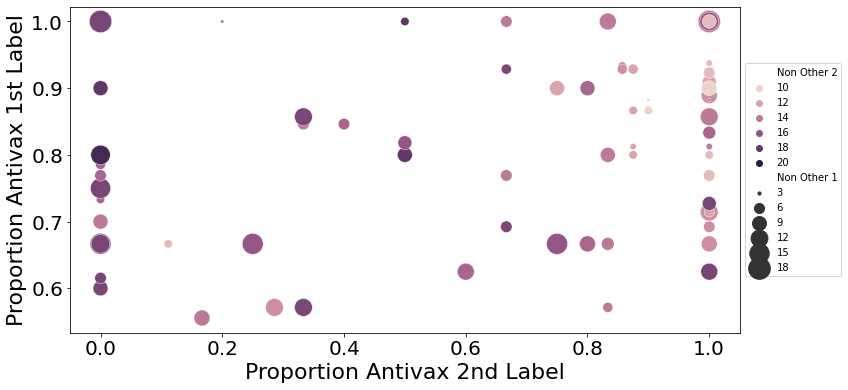

In [111]:
fig, axes = plt.subplots(1, 1, figsize = [12, 6])

df = label_count_1.merge(label_count_2, on = "com_id", suffixes = ["1", "2"]) \
.assign(antivax_tot = lambda x: x["antivax1"] + x["antivax2"]) \
.assign(non_other1 = lambda x: 20 - x["antivax1"] - x["provax1"]) \
.assign(non_other2 = lambda x: 20 - x["antivax2"] - x["provax2"]) \
.rename(columns = {"non_other1": "Non Other 1", "non_other2": "Non Other 2"})
cmap = sns.cubehelix_palette(as_cmap = True)


sns.scatterplot(data = df, x = "antivax_prop2", y = "antivax_prop1",
                hue = "Non Other 2", size = "Non Other 1",
                palette = cmap, sizes = (10, 500))

axes.legend(loc = "center left", bbox_to_anchor=(1, 0.5))

axes.set_ylabel("Proportion Antivax 1st Label", fontsize = ylab_fsize)
axes.set_xlabel("Proportion Antivax 2nd Label", fontsize = xlab_fsize)

#axes.set_xticks(axes.get_xticks() + 0.2)
plt.setp(axes.get_yticklabels(), fontsize = yticks_fsize, rotation = 0)
plt.setp(axes.get_xticklabels(), fontsize = xticks_fsize, rotation = 0)


<ipython-input-87-6d0eb047cffc>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


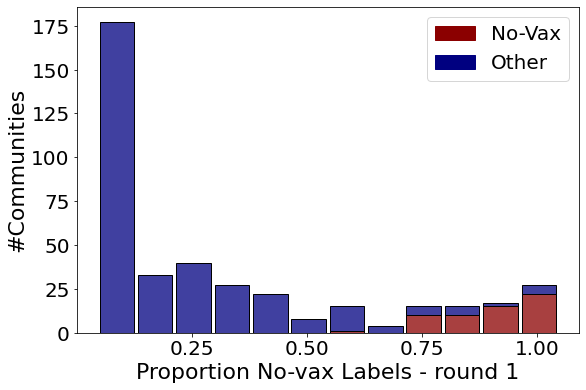

In [87]:
novax_patch = mpatches.Patch(color = "darkred", label = "No-Vax")
provax_patch = mpatches.Patch(color = "navy", label = "Other")

sns.set_palette(["navy", "darkred"])

xlab_fsize = 22
ylab_fsize = 22
leg_fsize = 20
yticks_fsize = 20
xticks_fsize = 20

size = (9,6)

fig, axes = plt.subplots(1,1, figsize = size)

df = label_count_1.merge(label_count_2, on = "com_id", suffixes = ["1", "2"], how = "outer") \
.assign(antivax_labels = lambda x: x["antivax1"] + x["antivax2"]).set_index("com_id")[["antivax_prop1", "antivax_labels"]] \
.fillna(0).assign(novax = lambda x: x["antivax_labels"] > 9)

sns.histplot(data = df, x = "antivax_prop1", bins = 12,
             hue = "novax", 
             multiple = "stack", shrink = .9)


axes.set_ylabel("#Communities", fontsize = ylab_fsize)
axes.set_xlabel("Proportion No-vax Labels - round 1", fontsize = xlab_fsize)
axes.legend_.set_title(None)

#axes.set_xticks(axes.get_xticks() + 0.2)
plt.setp(axes.get_yticklabels(), fontsize = yticks_fsize, rotation = 0)
plt.setp(axes.get_xticklabels(), fontsize = xticks_fsize, rotation = 0)


axes.set_xticks([(u + 1) * 0.25 for u in range(4)])
plt.legend(handles = [novax_patch, provax_patch], fontsize = leg_fsize, loc = "upper right")
#axes.set_title("", fontsize = 20)

fig.show()